In [ ]:
import pandas as pd

df = pd.read_csv('train.csv', encoding="cp1252")
df.head()

,Unnamed: 0,tweet,mention
0,0,#NoWaterInMalad: It's been 24 hours with no wa...,WaterProblem
1,1,"Another day, another water cut in Bandra! @Ada...",WaterProblem
2,2,Worried about the murky water coming out of ou...,WaterProblem
3,3,Can't believe the water pressure in Kandivali!...,WaterProblem
4,4,Day 3 of water cuts in Borivali @AdaniWater We...,WaterProblem


In [ ]:
df = df.drop_duplicates()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# tokenization after lowercasing

all_tokens_list = []
for each in df.tweet:
  if each is None:
    pass
  all_tokens_list.append(nltk.tokenize.word_tokenize(each.lower()))

print(len(all_tokens_list))

3876


In [ ]:
# removing stop words
from nltk.corpus import stopwords
import string

english_punctuation_stopwords = stopwords.words('english')
print(len(english_punctuation_stopwords))

english_punctuation_stopwords.extend([x for x in string.punctuation])
print(len(english_punctuation_stopwords))

179
211


In [ ]:
all_tokenized_tweets_without_stopwords = [[word for word in tweet if word.lower() not in english_punctuation_stopwords] for tweet in all_tokens_list]
all_tokenized_tweets_without_stopwords

[['nowaterinmalad',
  "'s",
  '24',
  'hours',
  'water',
  'supply',
  'malad',
  'west',
  'mybmc',
  'unacceptable',
  'need',
  'tankers',
  'asap',
  'mumbaiwatercrisis',
  '5:30'],
 ['another',
  'day',
  'another',
  'water',
  'cut',
  'bandra',
  'adaniwater',
  "'re",
  'paying',
  'watercut',
  'mumbaiproblems',
  '8:15'],
 ['worried',
  'murky',
  'water',
  'coming',
  'taps',
  'goregaon',
  'mybmc',
  'please',
  'send',
  'someone',
  'check',
  'water',
  'quality',
  'impurewater',
  'healthhazard',
  '9:45'],
 ['ca',
  "n't",
  'believe',
  'water',
  'pressure',
  'kandivali',
  'takes',
  'forever',
  'even',
  'fill',
  'bucket',
  'mybmc',
  'fix',
  'pipelines',
  'already',
  'lowwaterpressure',
  'frustrated',
  '11:00'],
 ['day',
  '3',
  'water',
  'cuts',
  'borivali',
  'adaniwater',
  "'re",
  'running',
  'stored',
  'water',
  'please',
  'prioritize',
  'restoration',
  'waterscarcity',
  'mumbaineedswater',
  '12:15',
  'pm'],
 ['anyone',
  'else',
  

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# snow_stemmer = SnowballStemmer(language='english')

tweets_with_lemmatizer_output = [ [lemmatizer.lemmatize(word, pos='v') for word in tokens] for tokens in all_tokenized_tweets_without_stopwords]
tweets_with_lemmatizer_output

[['nowaterinmalad',
  "'s",
  '24',
  'hours',
  'water',
  'supply',
  'malad',
  'west',
  'mybmc',
  'unacceptable',
  'need',
  'tankers',
  'asap',
  'mumbaiwatercrisis',
  '5:30'],
 ['another',
  'day',
  'another',
  'water',
  'cut',
  'bandra',
  'adaniwater',
  "'re",
  'pay',
  'watercut',
  'mumbaiproblems',
  '8:15'],
 ['worry',
  'murky',
  'water',
  'come',
  'tap',
  'goregaon',
  'mybmc',
  'please',
  'send',
  'someone',
  'check',
  'water',
  'quality',
  'impurewater',
  'healthhazard',
  '9:45'],
 ['ca',
  "n't",
  'believe',
  'water',
  'pressure',
  'kandivali',
  'take',
  'forever',
  'even',
  'fill',
  'bucket',
  'mybmc',
  'fix',
  'pipelines',
  'already',
  'lowwaterpressure',
  'frustrate',
  '11:00'],
 ['day',
  '3',
  'water',
  'cut',
  'borivali',
  'adaniwater',
  "'re",
  'run',
  'store',
  'water',
  'please',
  'prioritize',
  'restoration',
  'waterscarcity',
  'mumbaineedswater',
  '12:15',
  'pm'],
 ['anyone',
  'else',
  'dharavi',
  'fa

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


lemmatizer = WordNetLemmatizer()


tweets_with_lemmatizer_output = []
for each_tweet in all_tokenized_tweets_without_stopwords:
  pos_tags = pos_tag(each_tweet)

  # Lemmatize words based on their POS tags
  lemmatized_words = []
  for word, pos in pos_tags:
      if pos.startswith('N'):  # Nouns
          lemmatized_word = lemmatizer.lemmatize(word, pos='n')
      elif pos.startswith('V'):  # Verbs
          lemmatized_word = lemmatizer.lemmatize(word, pos='v')
      elif pos.startswith('J'):  # Adjectives
          lemmatized_word = lemmatizer.lemmatize(word, pos='a')
      elif pos.startswith('R'):  # Adverbs
          lemmatized_word = lemmatizer.lemmatize(word, pos='r')
      else:
          lemmatized_word = lemmatizer.lemmatize(word)  # Default to noun lemmatization
      lemmatized_words.append(lemmatized_word)
  tweets_with_lemmatizer_output.append(lemmatized_words)
print(tweets_with_lemmatizer_output)

[['nowaterinmalad', "'s", '24', 'hour', 'water', 'supply', 'malad', 'west', 'mybmc', 'unacceptable', 'need', 'tanker', 'asap', 'mumbaiwatercrisis', '5:30'], ['another', 'day', 'another', 'water', 'cut', 'bandra', 'adaniwater', "'re", 'pay', 'watercut', 'mumbaiproblems', '8:15'], ['worried', 'murky', 'water', 'come', 'tap', 'goregaon', 'mybmc', 'please', 'send', 'someone', 'check', 'water', 'quality', 'impurewater', 'healthhazard', '9:45'], ['ca', "n't", 'believe', 'water', 'pressure', 'kandivali', 'take', 'forever', 'even', 'fill', 'bucket', 'mybmc', 'fix', 'pipeline', 'already', 'lowwaterpressure', 'frustrate', '11:00'], ['day', '3', 'water', 'cut', 'borivali', 'adaniwater', "'re", 'run', 'stored', 'water', 'please', 'prioritize', 'restoration', 'waterscarcity', 'mumbaineedswater', '12:15', 'pm'], ['anyone', 'else', 'dharavi', 'facing', 'water', 'shortage', 'watertankerneeded', 'mybmc', 'please', 'send', 'tanker', 'afternoon', 'heat', 'kick', '1:30', 'pm'], ['leak', 'water', 'pipe', '

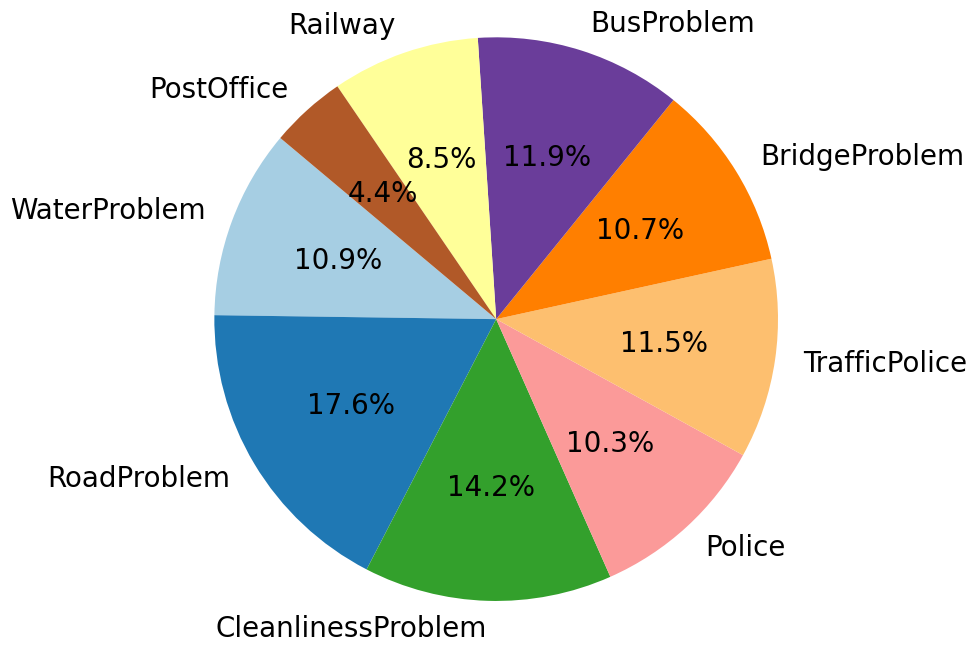

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

total_categories = Counter(y_data)

all_categories = list(total_categories.keys())
colors = plt.cm.Paired(np.linspace(0, 1, len(all_categories)))
color_map = dict(zip(all_categories, colors))

labels = list(total_categories.keys())
sizes = [total_categories[cat] for cat in all_categories]
colors = [color_map[cat] for cat in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 20})
# plt.title('Distribution of 3841 Tweets in Training Dataset')
plt.axis('equal')

plt.show()

In [ ]:
x_data = [ ' '.join(tweets) for tweets in tweets_with_lemmatizer_output]
x_data
y_data = [ mention.replace('@', '').replace('\n', '').split(' ')[0] for mention in df.mention]
print(y_data)
print(len(x_data) == len(y_data))

['WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterProblem', 'WaterP

In [ ]:
test = pd.read_csv("test.csv")
X_test = test["tweet"]
y_test = test["mention"]

In [ ]:
# testing
def preprocessing_testing(tweets, model):
  tokens = [nltk.tokenize.word_tokenize(tweet.lower()) for tweet in tweets]
  tokens = [[word for word in token if word.lower() not in english_punctuation_stopwords] for token in tokens]
  # print(tokens)

  lemmatizer = WordNetLemmatizer()

  lemmatized_word_list = []
  for token in tokens:
    pos_tags = pos_tag(token)

    # Lemmatize words based on their POS tags
    lemmatized_words = []
    for word, pos in pos_tags:
        if pos.startswith('N'):  # Nouns
            lemmatized_word = lemmatizer.lemmatize(word, pos='n')
        elif pos.startswith('V'):  # Verbs
           lemmatized_word = lemmatizer.lemmatize(word, pos='v')
        elif pos.startswith('J'):  # Adjectives
           lemmatized_word = lemmatizer.lemmatize(word, pos='a')
        elif pos.startswith('R'):  # Adverbs
          lemmatized_word = lemmatizer.lemmatize(word, pos='r')
        else:
          lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    lemmatized_word_list.append(lemmatized_words)
  # print("lemmatized_words = ", lemmatized_words)


  tweet = [' '.join(lemmatized_word) for lemmatized_word in lemmatized_word_list]
  # print("Tweet = ",tweet)

  test_tfidf_matrix = vectorizer.transform(tweet)

  # print("test_tfidf_matrix = ",test_tfidf_matrix)

  test_predictions = model.predict(test_tfidf_matrix)
  # print("Prediction = ", test_predictions)

  return test_predictions

### Logistic Regression Without Hyper Tuning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()

tfidf_matrix_x_data = vectorizer.fit_transform(x_data)

X_train = tfidf_matrix_x_data
y_train = y_data

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.70      0.64      0.67        36
        BusProblem       1.00      0.76      0.87        17
CleanlinessProblem       0.84      0.75      0.79        63
            Police       0.78      0.66      0.72        82
        PostOffice       1.00      0.94      0.97        16
           Railway       0.67      0.78      0.72        18
       RoadProblem       0.64      0.81      0.72        54
     TrafficPolice       0.70      0.77      0.73        79
      WaterProblem       0.90      0.93      0.92        58

          accuracy                           0.77       423
         macro avg       0.80      0.78      0.79       423
      weighted avg       0.78      0.77      0.77       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

### Logistic Regression With Hyper Tunning

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Penalty type (l1 is not compatible with lbfgs solver)
    'solver': ['liblinear', 'lbfgs'],  # Solver (lbfgs supports only l2 penalties)
    'max_iter': [100, 500]  # Maximum number of iterations
}

best_score = 0
best_params = {}

for C in param_grid['C']:
    for penalty in param_grid['penalty']:
        for solver in param_grid['solver']:
            for max_iter in param_grid['max_iter']:
                try:
                    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=max_iter)

                    model.fit(X_train, y_train)

                    y_pred = preprocessing_testing(X_test, model)

                    score = accuracy_score(y_test, y_pred)

                    if score > best_score:
                        best_score = score
                        best_params = {'C': C, 'penalty': penalty, 'solver': solver, 'max_iter': max_iter}

                except Exception as e:
                    print(f"Skipping parameters C={C}, penalty={penalty}, solver={solver}, max_iter={max_iter} due to error: {e}")

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, best_model)
print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = best_model.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 100}
Best Accuracy Score: 0.7683215130023641
Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.70      0.64      0.67        36
        BusProblem       1.00      0.76      0.87        17
CleanlinessProblem       0.84      0.75      0.79        63
            Police       0.78      0.66      0.72        82
        PostOffice       1.00      0.94      0.97        16
           Railway       0.67      0.78      0.72        18
       RoadProblem       0.64      0.81      0.72        54
     TrafficPolice       0.70      0.77      0.73        79
      WaterProblem       0.90      0.93      0.92        58

          accuracy                           0.77       423
         macro avg       0.80      0.78      0.79       423
      weighted avg       0.78      0.77      0.77       423

Classification Report (Training):
                    precis

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier1)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.41      0.42      0.41        36
        BusProblem       0.35      0.94      0.51        17
CleanlinessProblem       0.41      0.70      0.52        63
            Police       0.52      0.52      0.52        82
        PostOffice       0.82      0.88      0.85        16
           Railway       0.86      0.33      0.48        18
       RoadProblem       0.45      0.54      0.49        54
     TrafficPolice       0.58      0.23      0.33        79
      WaterProblem       0.77      0.41      0.54        58

          accuracy                           0.49       423
         macro avg       0.57      0.55      0.52       423
      weighted avg       0.55      0.49      0.48       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Power parameter for the Minkowski distance metric (1 is Manhattan, 2 is Euclidean)
}

best_score_knn = 0
best_params_knn = {}

for n_neighbors in param_grid_knn['n_neighbors']:
    for weights in param_grid_knn['weights']:
        for p in param_grid_knn['p']:
            try:
                model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

                model_knn.fit(X_train, y_train)

                y_pred = preprocessing_testing(X_test, model_knn)

                score = accuracy_score(y_test, y_pred)

                if score > best_score_knn:
                    best_score_knn = score
                    best_params_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}

            except Exception as e:
                print(f"Skipping parameters n_neighbors={n_neighbors}, weights={weights}, p={p} due to error: {e}")

print("Best Hyperparameters for KNN:", best_params_knn)
print("Best Accuracy Score for KNN:", best_score_knn)

best_model_knn = KNeighborsClassifier(**best_params_knn)
best_model_knn.fit(X_train, y_train)

y_pred_knn = preprocessing_testing(X_test, best_model_knn)
print("Classification Report (Testing) for KNN:")
print(classification_report(y_test, y_pred_knn))

y_pred_train_knn = best_model_knn.predict(X_train)
print("Classification Report (Training) for KNN:")
print(classification_report(y_train, y_pred_train_knn))

Best Hyperparameters for KNN: {'n_neighbors': 15, 'weights': 'distance', 'p': 2}
Best Accuracy Score for KNN: 0.5791962174940898
Classification Report (Testing) for KNN:
                    precision    recall  f1-score   support

     BridgeProblem       0.54      0.36      0.43        36
        BusProblem       0.43      0.94      0.59        17
CleanlinessProblem       0.49      0.78      0.60        63
            Police       0.64      0.60      0.62        82
        PostOffice       0.83      0.94      0.88        16
           Railway       0.75      0.17      0.27        18
       RoadProblem       0.46      0.76      0.57        54
     TrafficPolice       0.68      0.35      0.47        79
      WaterProblem       0.89      0.53      0.67        58

          accuracy                           0.58       423
         macro avg       0.64      0.60      0.57       423
      weighted avg       0.63      0.58      0.57       423

Classification Report (Training) for KNN:
     

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier2)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.75      0.58      0.66        36
        BusProblem       1.00      0.65      0.79        17
CleanlinessProblem       0.75      0.83      0.79        63
            Police       0.76      0.59      0.66        82
        PostOffice       1.00      0.94      0.97        16
           Railway       0.71      0.83      0.77        18
       RoadProblem       0.66      0.72      0.69        54
     TrafficPolice       0.61      0.78      0.69        79
      WaterProblem       0.91      0.88      0.89        58

          accuracy                           0.74       423
         macro avg       0.80      0.76      0.77       423
      weighted avg       0.76      0.74      0.74       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear'],  # Linear kernel
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

best_score_svc = 0
best_params_svc = {}

for C in param_grid_svc['C']:
    for max_iter in param_grid_svc['max_iter']:
        try:
            model_svc = SVC(C=C, kernel='linear', max_iter=max_iter)

            model_svc.fit(X_train, y_train)

            y_pred = preprocessing_testing(X_test, model_svc)

            score = accuracy_score(y_test, y_pred)

            if score > best_score_svc:
                best_score_svc = score
                best_params_svc = {'C': C, 'max_iter': max_iter}

        except Exception as e:
            print(f"Skipping parameters C={C}, max_iter={max_iter} due to error: {e}")

print("Best Hyperparameters for SVC (Linear):", best_params_svc)
print("Best Accuracy Score for SVC (Linear):", best_score_svc)

best_model_svc = SVC(**best_params_svc, kernel='linear')
best_model_svc.fit(X_train, y_train)

y_pred_svc = preprocessing_testing(X_test, best_model_svc)
print("Classification Report (Testing) for SVC (Linear):")
print(classification_report(y_test, y_pred_svc))

y_pred_train_svc = best_model_svc.predict(X_train)
print("Classification Report (Training) for SVC (Linear):")
print(classification_report(y_train, y_pred_train_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-

Best Hyperparameters for SVC (Linear): {'C': 1, 'max_iter': 100}
Best Accuracy Score for SVC (Linear): 0.7423167848699763


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification Report (Testing) for SVC (Linear):
                    precision    recall  f1-score   support

     BridgeProblem       0.75      0.58      0.66        36
        BusProblem       1.00      0.71      0.83        17
CleanlinessProblem       0.74      0.83      0.78        63
            Police       0.73      0.62      0.67        82
        PostOffice       1.00      0.94      0.97        16
           Railway       0.75      0.83      0.79        18
       RoadProblem       0.67      0.72      0.70        54
     TrafficPolice       0.62      0.75      0.68        79
      WaterProblem       0.91      0.86      0.88        58

          accuracy                           0.74       423
         macro avg       0.80      0.76      0.77       423
      weighted avg       0.75      0.74      0.74       423

Classification Report (Training) for SVC (Linear):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00      

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier3)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.75      0.58      0.66        36
        BusProblem       1.00      0.53      0.69        17
CleanlinessProblem       0.88      0.67      0.76        63
            Police       0.75      0.62      0.68        82
        PostOffice       1.00      0.88      0.93        16
           Railway       0.67      0.78      0.72        18
       RoadProblem       0.65      0.76      0.70        54
     TrafficPolice       0.54      0.78      0.64        79
      WaterProblem       0.91      0.91      0.91        58

          accuracy                           0.73       423
         macro avg       0.79      0.72      0.74       423
      weighted avg       0.76      0.73      0.73       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

param_grid_svc_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf'],  # RBF kernel
    'max_iter': [100, 500]  # Maximum number of iterations
}

best_score_svc_rbf = 0
best_params_svc_rbf = {}

for C in param_grid_svc_rbf['C']:
    for gamma in param_grid_svc_rbf['gamma']:
        for max_iter in param_grid_svc_rbf['max_iter']:
            try:
                model_svc_rbf = SVC(C=C, gamma=gamma, kernel='rbf', max_iter=max_iter)

                model_svc_rbf.fit(X_train, y_train)

                y_pred = preprocessing_testing(X_test, model_svc_rbf)

                score = accuracy_score(y_test, y_pred)

                if score > best_score_svc_rbf:
                    best_score_svc_rbf = score
                    best_params_svc_rbf = {'C': C, 'gamma': gamma, 'max_iter': max_iter}

            except Exception as e:
                print(f"Skipping parameters C={C}, gamma={gamma}, max_iter={max_iter} due to error: {e}")

print("Best Hyperparameters for SVC (RBF):", best_params_svc_rbf)
print("Best Accuracy Score for SVC (RBF):", best_score_svc_rbf)

best_model_svc_rbf = SVC(**best_params_svc_rbf, kernel='rbf')
best_model_svc_rbf.fit(X_train, y_train)

y_pred_svc_rbf = preprocessing_testing(X_test, best_model_svc_rbf)
print("Classification Report (Testing) for SVC (RBF):")
print(classification_report(y_test, y_pred_svc_rbf))

y_pred_train_svc_rbf = best_model_svc_rbf.predict(X_train)
print("Classification Report (Training) for SVC (RBF):")
print(classification_report(y_train, y_pred_train_svc_rbf))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

Best Hyperparameters for SVC (RBF): {'C': 10, 'gamma': 0.1, 'max_iter': 1000}
Best Accuracy Score for SVC (RBF): 0.7494089834515366


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification Report (Testing) for SVC (RBF):
                    precision    recall  f1-score   support

     BridgeProblem       0.73      0.61      0.67        36
        BusProblem       1.00      0.59      0.74        17
CleanlinessProblem       0.76      0.83      0.79        63
            Police       0.76      0.62      0.68        82
        PostOffice       1.00      0.94      0.97        16
           Railway       0.68      0.83      0.75        18
       RoadProblem       0.68      0.74      0.71        54
     TrafficPolice       0.64      0.77      0.70        79
      WaterProblem       0.91      0.88      0.89        58

          accuracy                           0.75       423
         macro avg       0.80      0.76      0.77       423
      weighted avg       0.76      0.75      0.75       423

Classification Report (Training) for SVC (RBF):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier4)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.61      0.47      0.53        36
        BusProblem       0.82      0.53      0.64        17
CleanlinessProblem       0.70      0.52      0.60        63
            Police       0.61      0.52      0.57        82
        PostOffice       0.82      0.88      0.85        16
           Railway       0.42      0.83      0.56        18
       RoadProblem       0.49      0.48      0.49        54
     TrafficPolice       0.44      0.44      0.44        79
      WaterProblem       0.65      0.91      0.76        58

          accuracy                           0.58       423
         macro avg       0.62      0.62      0.60       423
      weighted avg       0.59      0.58      0.57       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

best_score_dt = 0
best_params_dt = {}

for max_depth in param_grid_dt['max_depth']:
    for min_samples_split in param_grid_dt['min_samples_split']:
        for min_samples_leaf in param_grid_dt['min_samples_leaf']:
            for criterion in param_grid_dt['criterion']:
                try:
                    model_dt = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        criterion=criterion
                    )

                    model_dt.fit(X_train, y_train)

                    y_pred = preprocessing_testing(X_test, model_dt)

                    score = accuracy_score(y_test, y_pred)

                    if score > best_score_dt:
                        best_score_dt = score
                        best_params_dt = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'criterion': criterion
                        }

                except Exception as e:
                    print(f"Skipping parameters max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, criterion={criterion} due to error: {e}")

print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Best Accuracy Score for Decision Tree:", best_score_dt)

best_model_dt = DecisionTreeClassifier(**best_params_dt)
best_model_dt.fit(X_train, y_train)

y_pred_dt = preprocessing_testing(X_test, best_model_dt)
print("Classification Report (Testing) for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

y_pred_train_dt = best_model_dt.predict(X_train)
print("Classification Report (Training) for Decision Tree:")
print(classification_report(y_train, y_pred_train_dt))

Best Hyperparameters for Decision Tree: {'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'}
Best Accuracy Score for Decision Tree: 0.5957446808510638
Classification Report (Testing) for Decision Tree:
                    precision    recall  f1-score   support

     BridgeProblem       0.66      0.53      0.58        36
        BusProblem       0.90      0.53      0.67        17
CleanlinessProblem       0.56      0.60      0.58        63
            Police       0.62      0.49      0.55        82
        PostOffice       0.78      0.88      0.82        16
           Railway       0.50      0.83      0.62        18
       RoadProblem       0.53      0.52      0.52        54
     TrafficPolice       0.47      0.46      0.46        79
      WaterProblem       0.61      0.79      0.69        58

          accuracy                           0.58       423
         macro avg       0.63      0.62      0.61       423
      weighted avg       0.59      0.58    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

y_pred = preprocessing_testing(X_test, classifier5)

print("Classification Report (Testing):")
print(classification_report(y_test, y_pred))

y_pred_train = classifier.predict(X_train)
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train))

Classification Report (Testing):
                    precision    recall  f1-score   support

     BridgeProblem       0.65      0.56      0.60        36
        BusProblem       0.74      0.82      0.78        17
CleanlinessProblem       0.53      0.67      0.59        63
            Police       0.64      0.55      0.59        82
        PostOffice       0.82      0.88      0.85        16
           Railway       0.54      0.72      0.62        18
       RoadProblem       0.53      0.65      0.58        54
     TrafficPolice       0.71      0.56      0.62        79
      WaterProblem       0.80      0.76      0.78        58

          accuracy                           0.64       423
         macro avg       0.66      0.68      0.67       423
      weighted avg       0.65      0.64      0.64       423

Classification Report (Training):
                    precision    recall  f1-score   support

     BridgeProblem       1.00      1.00      1.00       416
        BusProblem       0.99

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

best_score_rf = 0
best_params_rf = {}

for n_estimators in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                for criterion in param_grid_rf['criterion']:
                    try:
                        model_rf = RandomForestClassifier(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            criterion=criterion
                        )

                        model_rf.fit(X_train, y_train)

                        y_pred = preprocessing_testing(X_test, model_rf)

                        score = accuracy_score(y_test, y_pred)

                        if score > best_score_rf:
                            best_score_rf = score
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'criterion': criterion
                            }

                    except Exception as e:
                        print(f"Skipping parameters n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, criterion={criterion} due to error: {e}")

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Accuracy Score for Random Forest:", best_score_rf)

best_model_rf = RandomForestClassifier(**best_params_rf)
best_model_rf.fit(X_train, y_train)

y_pred_rf = preprocessing_testing(X_test, best_model_rf)
print("Classification Report (Testing) for Random Forest:")
print(classification_report(y_test, y_pred_rf))

y_pred_train_rf = best_model_rf.predict(X_train)
print("Classification Report (Training) for Random Forest:")
print(classification_report(y_train, y_pred_train_rf))

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4, 'criterion': 'gini'}
Best Accuracy Score for Random Forest: 0.735224586288416
Classification Report (Testing) for Random Forest:
                    precision    recall  f1-score   support

     BridgeProblem       0.67      0.61      0.64        36
        BusProblem       0.73      0.94      0.82        17
CleanlinessProblem       0.74      0.73      0.74        63
            Police       0.72      0.54      0.62        82
        PostOffice       0.94      0.94      0.94        16
           Railway       0.70      0.89      0.78        18
       RoadProblem       0.57      0.81      0.67        54
     TrafficPolice       0.73      0.61      0.66        79
      WaterProblem       0.76      0.83      0.79        58

          accuracy                           0.71       423
         macro avg       0.73      0.77      0.74       423
      weighted avg   